In [1]:
import numpy as np
import matplotlib.pyplot as plt

$$f(x) = Ku(x)$$
$$u(x) = f''(x).$$
$$Ku(x) = \int_0^x u(y) \mathrm{d}y = \int_0^1 h(x-y)\mathrm{d}y.$$

$$K^*Ku(x) = \int_0^1 \left(\int_0^1 h(y-z)h(y-z) \mathrm{d}y\right) u(z)\mathrm{d}z.$$

We can estimate the density distribution in the subsurface by measuring the local gravitational pull. The density profile $u(x)$ is related to such measurements by a linear operator

$$Ku(x) = \int_0^1 k(x,y)u(y) \mathrm{d}y,$$

with $k(x,y) = (1 + (x-y)^2)^{-3/2}$.

Upon discretisation with stepsize $h = 1/n$, the inverse problem can be cast as a system of $n$ equations in $n$ unknowns

$$Ku = f.$$

You can use the code provided below to generate the matrix and noisy data for a given $u(x)$.

1. Compute the SVD of $K$ (using `np.linalg.svd`) and plot the singular values and vectors. What do they look like?

2. Plot the coefficients $\langle u_i, f\rangle$ and the singular values $\sigma_i$ to check the discrete Picard condition. What do you notice ?

3. Solve the inverse problem for noisy data using the (regularised) pseudo-inverse; compute the optimal $\alpha$ by computing the bias and variance components of the error. Is this a practically feasible way to compute the optimal $\alpha$?

4. Compare the solutions for $\alpha < \alpha_{opt}$ and $\alpha > \alpha_{opt}$ to the ground truth. What do you notice?

In [28]:
def getK(n):
    h = 1/n;
    x = np.linspace(h/2,1-h/2,n)
    xx,yy = np.meshgrid(x,x)
    #K = h/(1 + (xx - yy)**2)**(3/2)
    K = h/(np.abs(xx - yy)+1e-16)**(1/2)
    return K,x

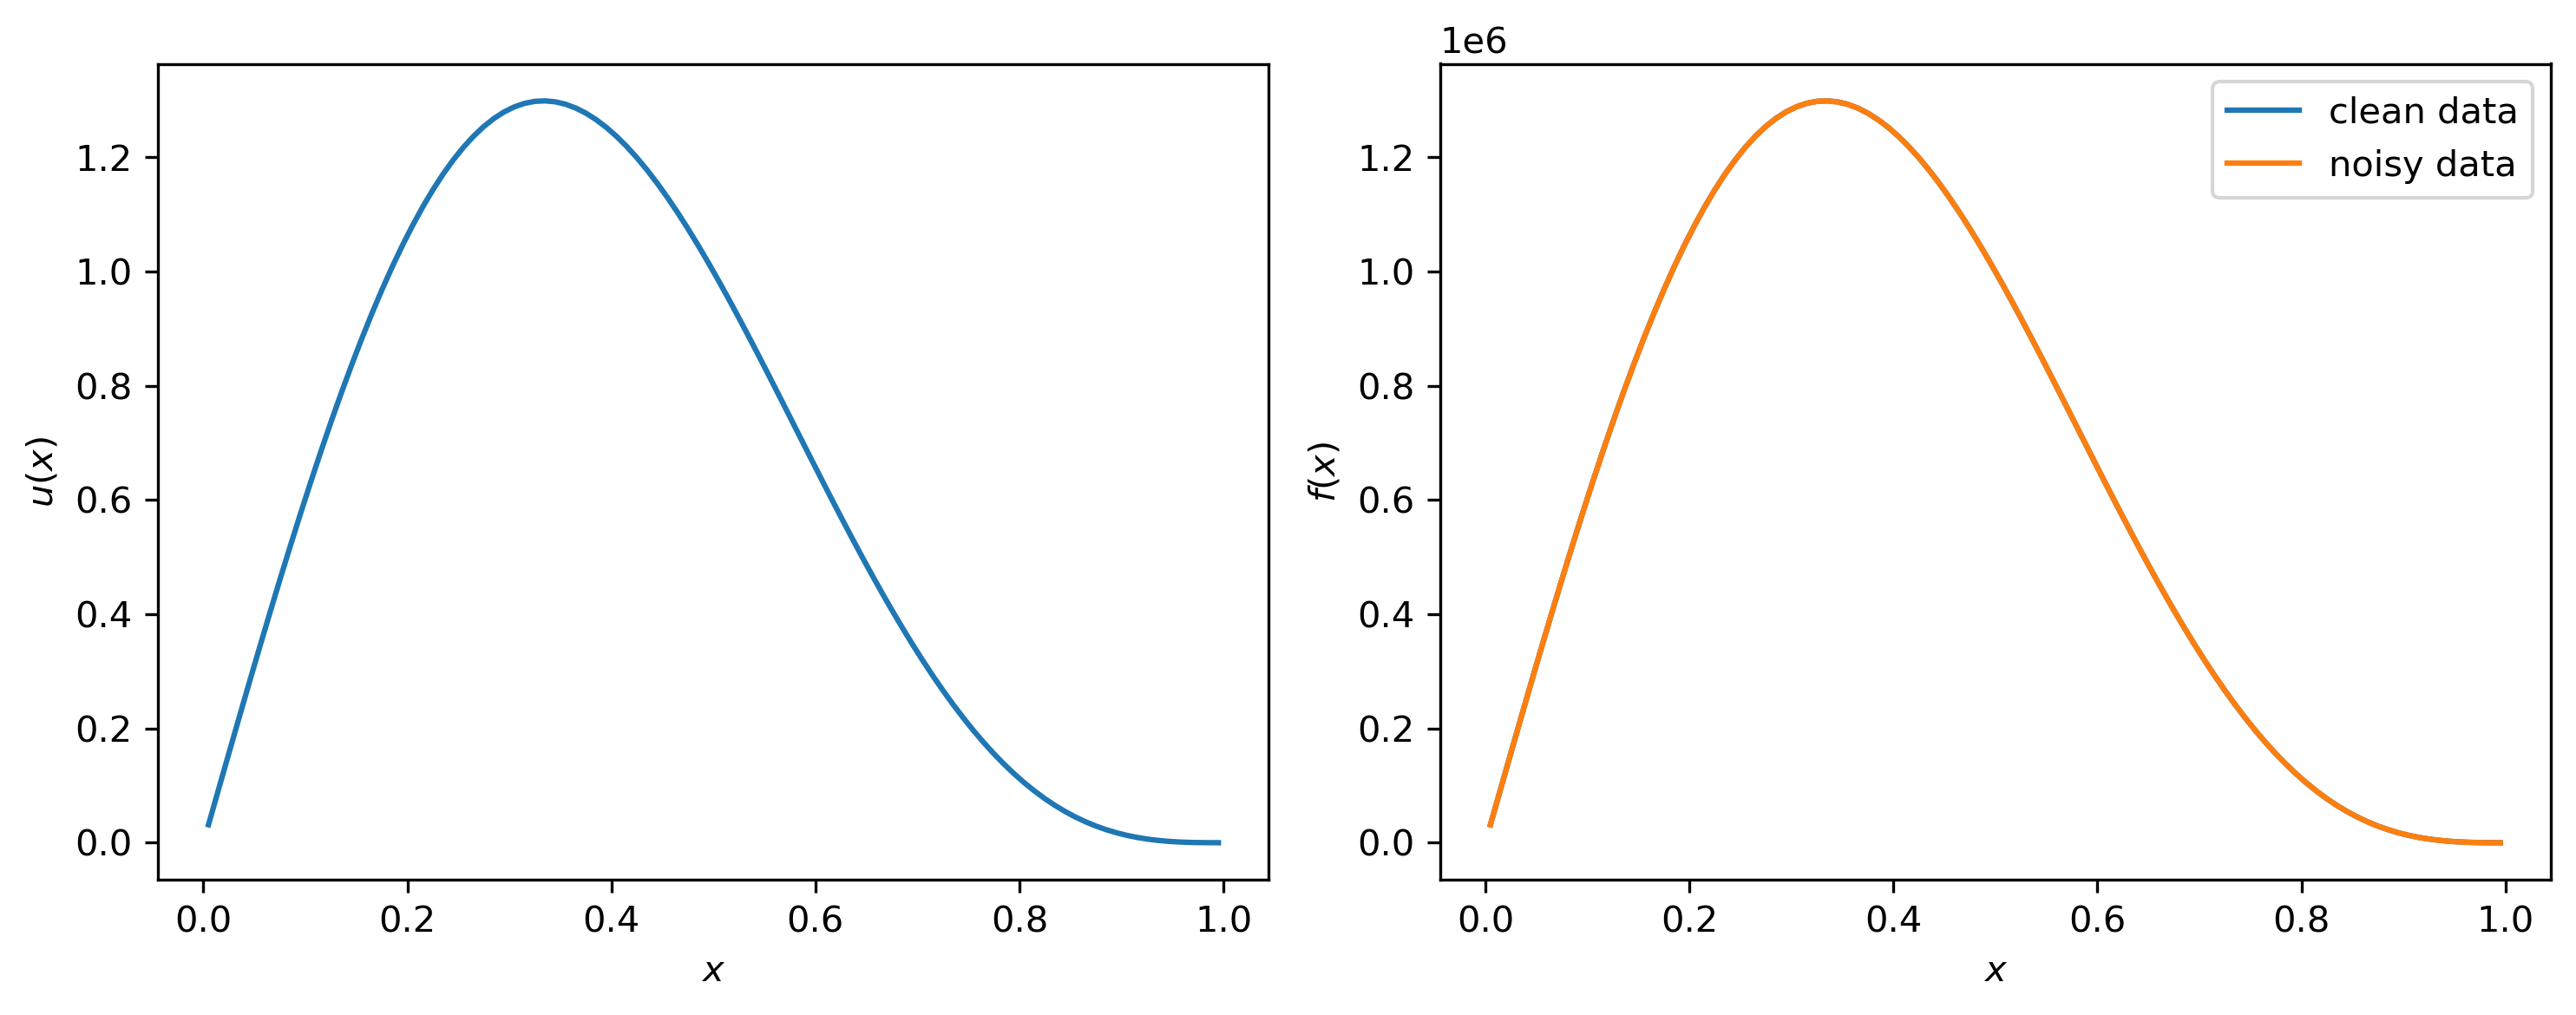

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# define forward operator
n = 100
delta = 1e-2
K,x = getK(n)

# define ground truth and compute data
u = np.sin(np.pi*x) + 0.5*np.sin(2*np.pi*x)
f = K@u

# add noise
noise = np.random.randn(n)
f_delta = f + delta*noise

# plot ground truth and data
fig, axs = plt.subplots(1,2)

axs[0].plot(x,u)
axs[0].set_xlabel(r'$x$')
axs[0].set_ylabel(r'$u(x)$')

axs[1].plot(x,f,label='clean data')
axs[1].plot(x,f_delta,label='noisy data')

axs[1].set_xlabel(r'$x$')
axs[1].set_ylabel(r'$f(x)$')
axs[1].legend()

fig.set_figwidth(10)
fig.tight_layout()
plt.show()

In [30]:
U, s, Vh = np.linalg.svd(K)

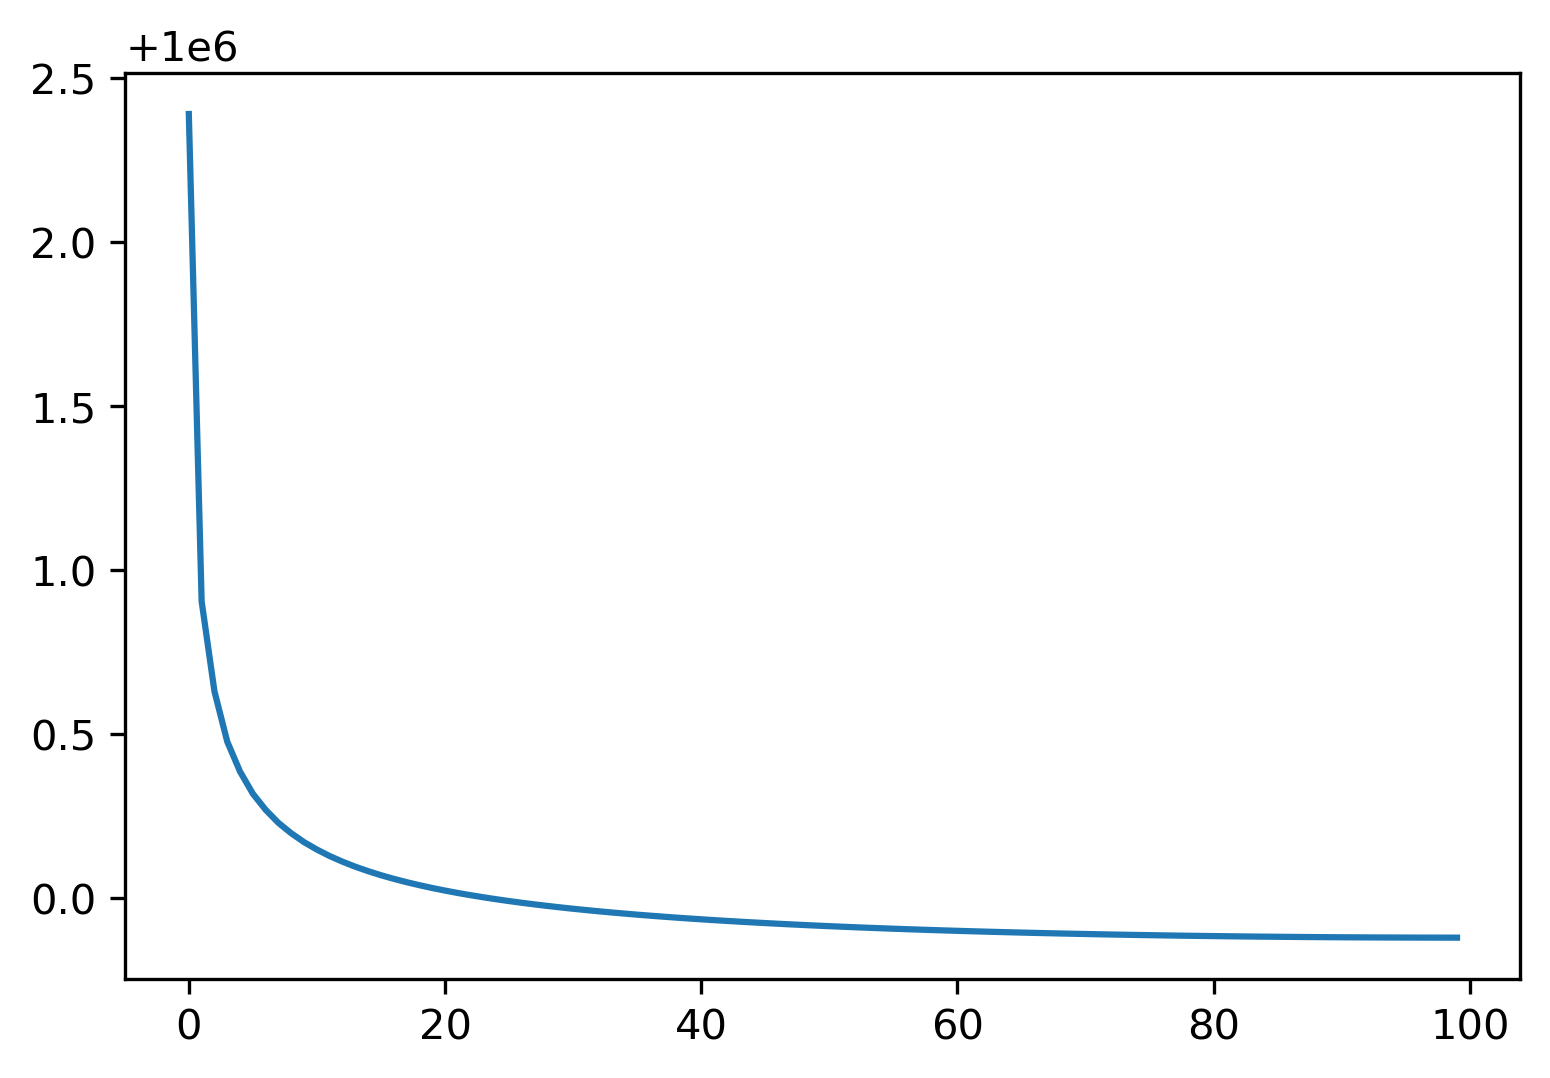

In [31]:
plt.plot(s)

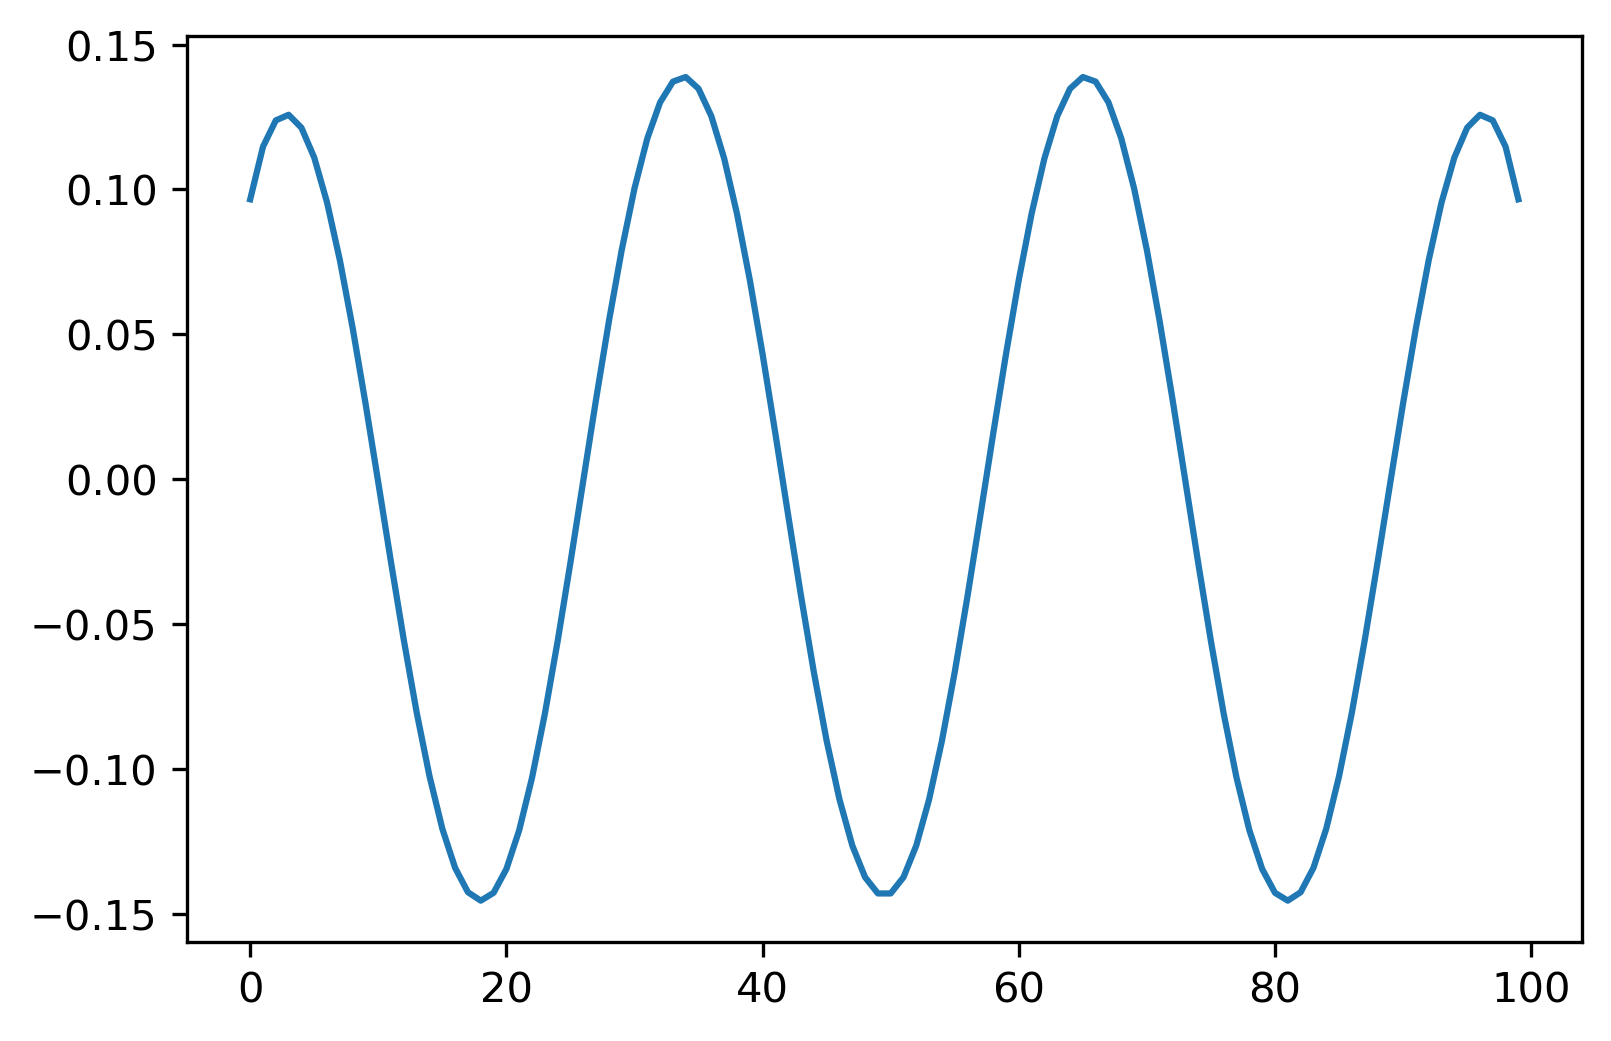

In [32]:
plt.plot(U[:,6])